<a href="https://www.kaggle.com/code/daesunryu/eda-google-play-store-apps?scriptVersionId=95880022" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
df = pd.read_csv('../input/google-playstore-apps/Google-Playstore.csv')

# Basic Exploration and Data Cleaning

In [3]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

**Checking missing values in all categories**

In [5]:
missing_values = df.isnull().sum()
missing_values

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

**Cheking total count of missing values**

In [6]:
total_missing_counts = missing_values.sum()
total_missing_counts

1305748

**Checking how many sells there are**

In [7]:
total_cells = np.prod(df.shape)
total_cells

55510656

**What is the percentage of missing values from the whole dataset**

In [8]:
percent_of_missing_values = (total_missing_counts/total_cells) * 100
percent_of_missing_values
#0.36%

2.3522474675853227

**we have only 0.36% missing values so it does not look bad**

# Issues list for dataset
* Drop unnesseary categories
* Missing values in serveral categories

# Data Cleaning

In [9]:
# Drop unnesseary categories
drop_list = ['App Id', 'Minimum Android',
             'Developer Id', 'Developer Website',
             'Developer Email', 'Privacy Policy',
            'Ad Supported', 'In App Purchases',
            'Editors Choice', 'Scraped Time']


df.drop(drop_list, axis='columns', inplace=True)

In [10]:
# Drop null values
df.dropna(inplace=True)

In [11]:
check_null_values = df.isnull().sum()
check_null_values

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Currency            0
Size                0
Released            0
Last Updated        0
Content Rating      0
dtype: int64

# What is my goal?
* Figure out the most popular categories, app
* Find the app, what has heighst rating and install number
* Drive conclusion

# EDA

In [12]:
df['Category'].value_counts()

Education                  236107
Music & Audio              153447
Tools                      138318
Business                   136537
Entertainment              135469
Books & Reference          115534
Lifestyle                  115332
Personalization             88860
Health & Fitness            80713
Productivity                75263
Shopping                    71565
Food & Drink                71019
Travel & Local              64877
Finance                     62118
Arcade                      52487
Puzzle                      49908
Casual                      48868
Communication               46136
Sports                      45811
Social                      43124
News & Magazines            41869
Photography                 35161
Medical                     30117
Action                      26619
Maps & Navigation           25048
Adventure                   22538
Simulation                  22469
Educational                 20732
Art & Design                18309
Auto & Vehicle

Top 7 categories:
1. Education
2. Music & Audio
3. Tools
4. Business
5. Entertainment
6. Books & Reference
7. Lifestyle

In [13]:
top_7_list = ['Education', 'Music & Audio', "Tools", "Business", "Entertainment", "Books & Reference", "Lifestyle"]
top = df[df['Category'].isin(top_7_list)].reset_index(drop=True)

In [14]:
top.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Released,Last Updated,Content Rating
0,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,"May 21, 2020","May 06, 2021",Everyone
1,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone
2,The Everyday Calendar,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,USD,16M,"Jun 21, 2019","Jun 21, 2019",Everyone
3,All in one shopping app,Tools,5.0,6.0,50+,50.0,62,True,0.0,USD,2.0M,"Apr 24, 2019","May 05, 2019",Everyone
4,REDMOND Robot,Lifestyle,3.7,328.0,"10,000+",10000.0,31235,True,0.0,USD,70M,"Jul 1, 2020","May 26, 2021",Everyone


In [15]:
df.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Released,Last Updated,Content Rating
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,"Feb 26, 2020","Feb 26, 2020",Everyone
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,"May 21, 2020","May 06, 2021",Everyone
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone


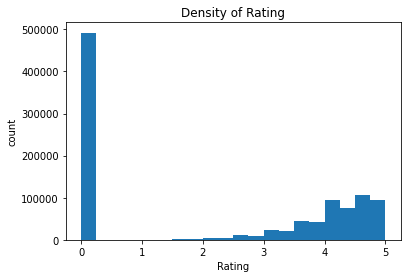

In [16]:
fig, ax = plt.subplots()

ax.hist(top['Rating'], bins=20)

ax.set(title="Density of Rating",
      xlabel="Rating",
      ylabel="count")

plt.show()

It seems like there are much more apps with 0 rating

In [17]:
bigger_than_0 = top[top['Rating'] > 0]['Rating']

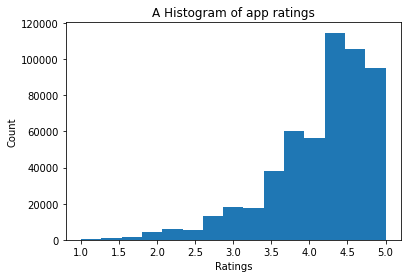

In [18]:
fig, ax = plt.subplots()

ax.hist(bigger_than_0, bins=15)

ax.set(title="A Histogram of app ratings",
      xlabel="Ratings",
      ylabel="Count")

plt.show()

Histogram shows that majority of the apps are rated between 3.8 ~ 4.8.
<br>
You see also so many 5 stars rating.

In [19]:
with pd.option_context('float_format', '{:f}'.format):
    print(top["Rating Count"].describe())

count    1030744.000000
mean        1109.977876
std        62789.633624
min            0.000000
25%            0.000000
50%            5.000000
75%           35.000000
max     35128398.000000
Name: Rating Count, dtype: float64


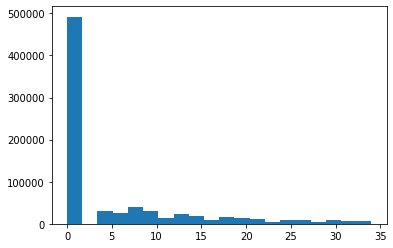

In [20]:
fig, ax = plt.subplots()

d = top[top["Rating Count"] < 35]

ax.hist(d["Rating Count"], bins=20)

plt.show()

This shows that only top 25% apps have over 35 rating count. it means that only small portion of apps dominate the app market while more than 75% of apps have only 5 rating count.

Let's find the apps which have more than 10 milions rating counts

In [21]:
ten_mil = top[top["Rating Count"] >= 10000000]
ten_mil.shape

(8, 14)

In [22]:
ten_mil[["App Name","Rating Count", "Rating"]].sort_values(by="Rating Count", ascending=False)

,App Name,Rating Count,Rating
960483,Google Play services,35128398.0,4.2
429109,Spotify: Listen to podcasts & find music you love,22752840.0,4.4
790217,Google,19798962.0,4.2
571598,"Safe Security - Antivirus, Booster, Phone Cle...",16783533.0,4.6
326382,SHAREit - Transfer & Share,16023749.0,4.2
732240,Google Play Games,12016421.0,4.3
16368,Netflix,11694633.0,4.4
468041,Duolingo: Learn Languages Free,11103561.0,4.6


So you see here the most popular apps 

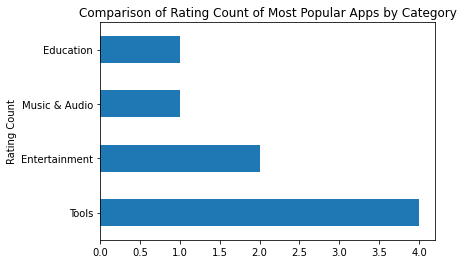

In [23]:
ax = ten_mil['Category'].value_counts().plot.barh()

ax.set(title='Comparison of Rating Count of Most Popular Apps by Category',
       ylabel='Rating Count')

plt.show();

The apps that have tools as a caregory, are most popular

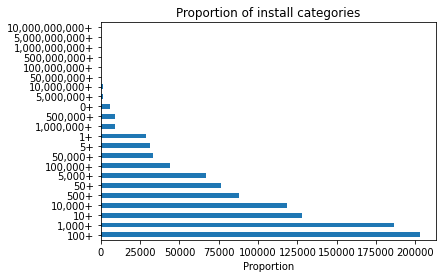

In [24]:
fig, ax = plt.subplots()


top["Installs"].value_counts().plot.barh()

ax.set(title='Proportion of install categories',
       xlabel='Proportion', ylabel='')

plt.show();

This shows that only few apps have more than 1 milion install counts

In [25]:
not_free = top[top["Price"] != 0]
with pd.option_context('float_format', '{:f}'.format):
    print(not_free["Price"].describe())


count   18835.000000
mean        5.923038
std        19.219954
min         0.204735
25%         1.490000
50%         2.490000
75%         4.990000
max       399.990000
Name: Price, dtype: float64


There is a huge gap between max and min.
<br>
Over 50% of apps are just about 3 dollar but the max app is 399

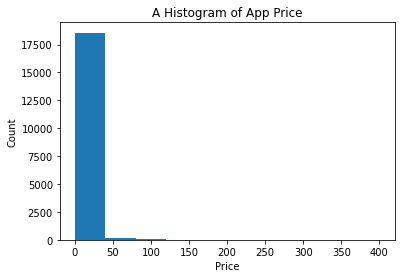

In [26]:
fig, ax = plt.subplots()

ax.hist(not_free["Price"], bins=10)

ax.set(title="A Histogram of App Price",
      xlabel="Price",
      ylabel="Count")

plt.show()

As you can see the most apps cost around 0 ~ 40 dollar

# Conclusion

The app market is very competitive. As always in the buseness wolrd, only small porpotion of apps dominate the entire market.
<br>
Only 1/4 of all apps have over 35 rating counts and most popular apps have over 4 star ratings, milions rating counts
<br>
Most popular category is tools, apps like google or spotify
